# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
##IMPORT MODULES, API KEY, VARIABLES (LAT AND LONG), AND CSV
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [58]:
##GENERATE CITIES LIST
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

631


['avarua',
 'yellowknife',
 'talcahuano',
 'edendale',
 'jaisalmer',
 'mataura',
 'castro',
 'barrow',
 'puerto carreno',
 'corner brook',
 'shetpe',
 'rikitea',
 'salisbury',
 'fort-shevchenko',
 'arraial do cabo',
 'ushuaia',
 'lompoc',
 'haines junction',
 'mar del plata',
 'butaritari',
 'namibe',
 'kapaa',
 'biak',
 'longyearbyen',
 'campbell river',
 'tezu',
 'hermanus',
 'kastamonu',
 'amderma',
 'odesa',
 'cidreira',
 'grand river south east',
 'albany',
 'cayenne',
 'bilma',
 'brodnica',
 'norman wells',
 'clyde river',
 'qaanaaq',
 'kodiak',
 'lata',
 'ambodifototra',
 'quatre cocos',
 'tuktoyaktuk',
 'constitucion',
 'victoria',
 'maturin',
 'slave lake',
 'fairbanks',
 'vaini',
 'taolanaro',
 'port macquarie',
 'kiama',
 'khani',
 'puerto ayora',
 'kharp',
 'sao filipe',
 'attawapiskat',
 'lorengau',
 'mount isa',
 'atuona',
 'bluff',
 'provideniya',
 'punta arenas',
 'gunnedah',
 'souillac',
 'ixtapa',
 'baherden',
 'ulladulla',
 'sitka',
 'kathmandu',
 'thompson',
 'hofn'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
##PERFORM API CALLS
#Set variables for url and city 
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "timizart"

#Set get url 
api_url = url + "appid=" + wkey + "&q=" + city + "&units=imperial"

#Perform API call with json response
weather_response = requests.get(api_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 4.25, 'lat': 36.8},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 42.79,
  'pressure': 1031.46,
  'humidity': 77,
  'temp_min': 42.79,
  'temp_max': 42.79,
  'sea_level': 1031.46,
  'grnd_level': 965.41},
 'wind': {'speed': 2.39, 'deg': 21.0006},
 'rain': {'3h': 0.13},
 'clouds': {'all': 88},
 'dt': 1551050799,
 'sys': {'message': 0.0031,
  'country': 'DZ',
  'sunrise': 1550989181,
  'sunset': 1551029581},
 'id': 2476396,
 'name': 'Timizart',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
##CONVERT RAW DATA TO A DATAFRAME
#Create df with cities data and NaN data for rest of the columns
cities_df = pd.DataFrame({
    "City":cities,
    "Temp":np.nan,
    "Humidity":np.nan,
    "Cloudiness":np.nan,
    "Wind Speed":np.nan
})
#Display the df
cities_df

,City,Temp,Humidity,Cloudiness,Wind Speed
0,avarua,NaN,NaN,NaN,NaN
1,yellowknife,NaN,NaN,NaN,NaN
2,talcahuano,NaN,NaN,NaN,NaN
3,edendale,NaN,NaN,NaN,NaN
4,jaisalmer,NaN,NaN,NaN,NaN
5,mataura,NaN,NaN,NaN,NaN
6,castro,NaN,NaN,NaN,NaN
7,barrow,NaN,NaN,NaN,NaN
8,puerto carreno,NaN,NaN,NaN,NaN
9,corner brook,NaN,NaN,NaN,NaN


In [61]:
##WRITE API CALL DATA TO DF
#Start for loop for number of row in previous df
for index, row in cities_df[0:631].iterrows():
    try:
        #All query and param data must be within indentation
        row = row.copy()
        city= row['City']
        print(city)

        url = "http://api.openweathermap.org/data/2.5/weather?"

        query_url = url + "appid=" + wkey + "&q=" + city + "&units=imperial"
        print(query_url)
        
        #API call
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_json

        #Write info to df
        cities_df.at[index,"Temp"]= weather_json["main"]["temp"]
        cities_df.at[index,"Humidity"]= weather_json["main"]["humidity"]
        cities_df.at[index,"Cloudiness"]= weather_json["clouds"]["all"]
        cities_df.at[index,"Wind Speed"]= weather_json["wind"]["speed"]
        cities_df.at[index,"lat"]= weather_json["coord"]["lat"]
        cities_df.at[index,"lon"]= weather_json["coord"]["lon"]
        
    #Error exception for cities with no data
    except KeyError:
        print(f"No data in, {row.copy()} keep NaN in df.")

#Display the df
cities_df

avarua
http://api.openweathermap.org/data/2.5/weather?appid=df55391a31848273e293e942cb214071&q=avarua&units=imperial
yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=df55391a31848273e293e942cb214071&q=yellowknife&units=imperial
talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=df55391a31848273e293e942cb214071&q=talcahuano&units=imperial
edendale
http://api.openweathermap.org/data/2.5/weather?appid=df55391a31848273e293e942cb214071&q=edendale&units=imperial
jaisalmer
http://api.openweathermap.org/data/2.5/weather?appid=df55391a31848273e293e942cb214071&q=jaisalmer&units=imperial
mataura
http://api.openweathermap.org/data/2.5/weather?appid=df55391a31848273e293e942cb214071&q=mataura&units=imperial
castro
http://api.openweathermap.org/data/2.5/weather?appid=df55391a31848273e293e942cb214071&q=castro&units=imperial
barrow
http://api.openweathermap.org/data/2.5/weather?appid=df55391a31848273e293e942cb214071&q=barrow&units=imperial
puerto carreno
http://api.openweat

,City,Temp,Humidity,Cloudiness,Wind Speed,lat,lon
0,avarua,82.40,69.0,0.0,3.36,-21.21,-159.78
1,yellowknife,-9.41,63.0,40.0,4.70,62.45,-114.38
2,talcahuano,62.60,55.0,0.0,16.11,-36.72,-73.12
3,edendale,66.01,94.0,88.0,2.17,-29.65,30.31
4,jaisalmer,52.33,59.0,20.0,4.29,26.91,70.91
5,mataura,58.36,57.0,0.0,7.20,-46.19,168.86
6,castro,55.40,54.0,40.0,9.17,-42.48,-73.76
7,barrow,55.84,60.0,0.0,14.70,-38.31,-60.23
8,puerto carreno,89.60,43.0,0.0,5.82,6.19,-67.49
9,corner brook,6.80,65.0,5.0,3.36,48.95,-57.95


In [62]:
##PREVIEW DATA FRAME W/O DISPLAYING ALL API CALLS
cities_df



,City,Temp,Humidity,Cloudiness,Wind Speed,lat,lon
0,avarua,82.40,69.0,0.0,3.36,-21.21,-159.78
1,yellowknife,-9.41,63.0,40.0,4.70,62.45,-114.38
2,talcahuano,62.60,55.0,0.0,16.11,-36.72,-73.12
3,edendale,66.01,94.0,88.0,2.17,-29.65,30.31
4,jaisalmer,52.33,59.0,20.0,4.29,26.91,70.91
5,mataura,58.36,57.0,0.0,7.20,-46.19,168.86
6,castro,55.40,54.0,40.0,9.17,-42.48,-73.76
7,barrow,55.84,60.0,0.0,14.70,-38.31,-60.23
8,puerto carreno,89.60,43.0,0.0,5.82,6.19,-67.49
9,corner brook,6.80,65.0,5.0,3.36,48.95,-57.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

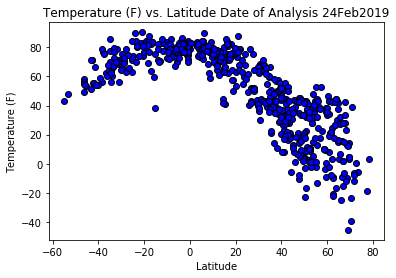

In [67]:
##LATITUDE VS. TEMPERATURE PLOT
plt.scatter(cities_df['lat'], cities_df['Temp'], marker="o", facecolors="blue", edgecolors="black")

#Format scatter plot
plt.title("Temperature (F) vs. Latitude Date of Analysis 24Feb2019")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()


#### Latitude vs. Humidity Plot

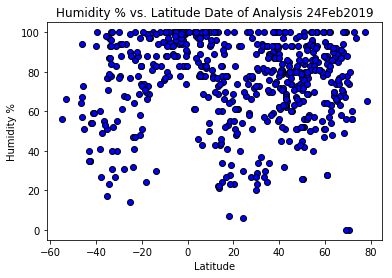

In [68]:
##LATITUDE VS. HUMIDITY PLOT
plt.scatter(cities_df['lat'], cities_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

#Format scatter plot
plt.title("Humidity % vs. Latitude Date of Analysis 24Feb2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.savefig("Humidity.png")
plt.show()



#### Latitude vs. Cloudiness Plot

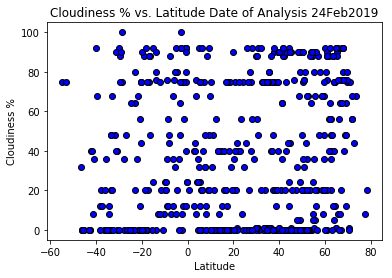

In [70]:
##LATITUDE VS. CLOUDINESS PLOT
plt.scatter(cities_df['lat'], cities_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

#Format scatter plot
plt.title("Cloudiness % vs. Latitude Date of Analysis 24Feb2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("Cloudiness.png")
plt.show()




#### Latitude vs. Wind Speed Plot

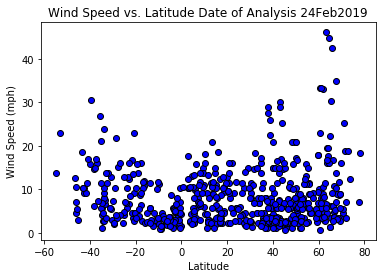

In [71]:
##LATITUDE VS. WIND SPEED PLOT
plt.scatter(cities_df['lat'], cities_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

#Format scatter plot
plt.title("Wind Speed vs. Latitude Date of Analysis 24Feb2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Wind Speed.png")
plt.show()
